<a href="https://colab.research.google.com/github/rjakkani1015/rashmi_INFO5731_-Fall2021/blob/main/In_class_exercise_05_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **The fifth in-class-exercise (40 points in total, 11/11/2021)**

(20 points) The purpose of the question is to practice different machine learning algorithms for text classification as well as the performance evaluation. In addition, you are requried to conduct *10 fold cross validation (https://scikit-learn.org/stable/modules/cross_validation.html)* in the training. 

The dataset can be download from here: https://github.com/unt-iialab/info5731_spring2021/blob/main/class_exercises/exercise09_datacollection.zip. The dataset contains two files train data and test data for sentiment analysis in IMDB review, it has two categories: 1 represents positive and 0 represents negative. You need to split the training data into training and validate data (80% for training and 20% for validation, https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6) and perform 10 fold cross validation while training the classifier. The final trained model was final evaluated on the test data. 

Algorithms:

(1) MultinominalNB

(2) SVM 

(3) KNN 

(4) Decision tree

(5) Random Forest

(6) XGBoost

Evaluation measurement:

(1) Accuracy

(2) Recall

(3) Precison 

(4) F-1 score

In [ ]:
import pandas as pd
from xgboost import XGBClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.model_selection import train_test_split, cross_validate, StratifiedKFold

Traindataframe = pd.read_csv(r'/content/stsa-train.txt',sep = 'delimiter=',header= None,names=['abstract'])
Testdataframe = pd.read_csv(r'/content/stsa-test.txt',sep = 'delimiter=',header= None,names=['abstract'])

Traindataframe[['Sentiment','abstract']] = Traindataframe["abstract"].str.split(" ", 1, expand=True)
Testdataframe[['Sentiment','astract']] = Testdataframe["abstract"].str.split(" ", 1, expand=True)




/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  if sys.path[0] == '':


In [ ]:
print(Traindataframe.head())

                                            abstract Sentiment
0  a stirring , funny and finally transporting re...         1
1  apparently reassembled from the cutting-room f...         0
2  they presume their audience wo n't sit still f...         0
3  this is a visually stunning rumination on love...         1
4  jonathan parker 's bartleby should have been t...         1


In [ ]:
print(Testdataframe.head())

                                            abstract  ...                                            astract
0   0 no movement , no yuks , not much of anything .  ...     no movement , no yuks , not much of anything .
1  0 a gob of drivel so sickly sweet , even the e...  ...  a gob of drivel so sickly sweet , even the eag...
2  0 gangs of new york is an unapologetic mess , ...  ...  gangs of new york is an unapologetic mess , wh...
3  0 we never really feel involved with the story...  ...  we never really feel involved with the story ,...
4          1 this is one of polanski 's best films .  ...            this is one of polanski 's best films .

[5 rows x 3 columns]


In [ ]:
import nltk
import re
import string
nltk.download('stopwords')
nltk.download('wordnet')
sw = nltk.corpus.stopwords.words('english')
from nltk.stem import WordNetLemmatizer
WL= WordNetLemmatizer()

def cleaneddata(T):
  T ="".join([word.lower() for word in T if word not in string.punctuation])
  T = re.sub("^\d+\s|\s\d+\s|\s\d+$", " ", T)
  phrases = re.split('\W+',T)
  T = [WL.lemmatize(word) for word in phrases if word not in sw]
  return T

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf_idf = TfidfVectorizer(analyzer = cleaneddata)
tfidf1 = tf_idf.fit_transform(Traindataframe['abstract'])
tfidf1.shape

(6920, 13343)

In [ ]:
tf_idataframe = pd.DataFrame(tfidf1.toarray())
tf_idataframe.columns=tf_idf.get_feature_names()
tf_idataframe.head()

,,100minute,103minute,10course,10th,10thgrade,10year,10yearold,112minute,12,129minute,12th,12yearold,13th,14yearold,15th,15year,168minute,18yearold,1930s,1940s,1950s,1960s,1970s,1980s,19th,19thcentury,20car,20th,21st,22yearold,24andunders,26yearold,2day,30,34th,37minute,3d,3yearolds,40,...,yuen,yung,yvan,zaidan,zany,zap,zaza,zboys,zeal,zealand,zealously,zeitgeist,zelda,zellweger,zemeckis,zen,zero,zerodimensional,zeus,zhang,zhao,zhuangzhuang,zigzag,zing,zinger,zingerfilled,zip,zipper,zippy,zishe,ziyi,zoe,zombie,zombieland,zone,zoning,zoom,zwick,zzzzzzzzz,élan
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.400584,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.048154,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.029784,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.049596,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.048782,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
Test_tfidf = tf_idf.transform(Testdataframe['abstract'])
print(Test_tfidf.shape)

(1821, 13343)


In [ ]:
DT1 = DT.fit(train1,train2)
FDT = DT1.predict(test1)
print('Acc_result %s' % accuracy_score(FDT,test2))
print(classification_report(test2,FDT))


Acc_result 0.6625722543352601
              precision    recall  f1-score   support

           0       0.66      0.63      0.64       671
           1       0.66      0.70      0.68       713

    accuracy                           0.66      1384
   macro avg       0.66      0.66      0.66      1384
weighted avg       0.66      0.66      0.66      1384



In [ ]:
MNB = MultinomialNB()
SVM = LinearSVC()
KNN = KNeighborsClassifier(n_neighbors=5,n_jobs=-1)
DT = DecisionTreeClassifier()
RF = RandomForestClassifier()
XGB = XGBClassifier()

In [ ]:
train1, test1, train2, test2 = train_test_split(tfidf1, Traindataframe['Sentiment'].values,
                                                test_size=0.2, random_state=42)

In [ ]:
MNB1 = MNB.fit(train1,train2)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
FMNB = MNB1.predict(test1)
print('Acc_result %s' % accuracy_score(FMNB,test2))
print(classification_report(test2,FMNB))

Acc_result 0.7955202312138728
              precision    recall  f1-score   support

           0       0.85      0.70      0.77       671
           1       0.76      0.88      0.82       713

    accuracy                           0.80      1384
   macro avg       0.80      0.79      0.79      1384
weighted avg       0.80      0.80      0.79      1384



In [ ]:
from sklearn.model_selection import cross_val_score
result = cross_val_score(MNB, test1, test2, cv=10)
print("MNB_given",result.mean())

MNB_given 0.7247054530288813


In [ ]:
SVM1 = SVM.fit(train1,train2)
FSVM = SVM1.predict(test1)
print('Acc_result %s' % accuracy_score(FSVM,test2))
print(classification_report(test2,ESVM))

Acc_result 0.791907514450867
              precision    recall  f1-score   support

           0       0.81      0.75      0.78       671
           1       0.78      0.83      0.80       713

    accuracy                           0.79      1384
   macro avg       0.79      0.79      0.79      1384
weighted avg       0.79      0.79      0.79      1384



In [ ]:
from sklearn.model_selection import cross_val_score
result = cross_val_score(SVM, test1, test2, cv=10)
print("SVM_given",result.mean())

SVM_given 0.7348034615785632


In [ ]:
KNN1 = KNN.fit(train1,train2)
FKNN = KNN1.predict(test1)
print('Acc_result %s' % accuracy_score(FKNN,test2))
print(classification_report(test2,FKNN))

Acc_result 0.740606936416185
              precision    recall  f1-score   support

           0       0.75      0.71      0.73       671
           1       0.74      0.77      0.75       713

    accuracy                           0.74      1384
   macro avg       0.74      0.74      0.74      1384
weighted avg       0.74      0.74      0.74      1384



In [ ]:
from sklearn.model_selection import cross_val_score
result = cross_val_score(KNN, test1, test2, cv=10)
print("KNN_given",result.mean())

KNN_given 0.6675737670732979


In [ ]:
XGB1 = XGB.fit(train1,train2)
FXGB = XGB1.predict(test1)
result = cross_val_score(XGB, test1, test2, cv=10)
print('Acc_result %s' % accuracy_score(FXGB,test2))
print(classification_report(test2,FXGB))
print("XGB_given",result.mean())

Acc_result 0.6488439306358381
              precision    recall  f1-score   support

           0       0.76      0.41      0.53       671
           1       0.61      0.88      0.72       713

    accuracy                           0.65      1384
   macro avg       0.68      0.64      0.62      1384
weighted avg       0.68      0.65      0.63      1384

XGB_given 0.6198884370764259


In [ ]:
result = cross_val_score(DT, test1, test2, cv=10)
print("DT_given",result.mean())

DT_given 0.6141174017307892


In [ ]:
RF1 = RF.fit(train1,train2)
FRF = RF1.predict(test1)
result = cross_val_score(RF, test1, test2, cv=10)
print('Acc_result %s' % accuracy_score(FRF,test2))
print(classification_report(test2,FRF))
print("RF_given",result.mean())

Acc_result 0.7434971098265896
              precision    recall  f1-score   support

           0       0.77      0.68      0.72       671
           1       0.73      0.80      0.76       713

    accuracy                           0.74      1384
   macro avg       0.75      0.74      0.74      1384
weighted avg       0.75      0.74      0.74      1384

RF_given 0.6827494526118236


In [ ]:
Test_MNB = MNB1.predict(Test_tfidf)
print('Acc_result %s' % accuracy_score(Test_MNB,Testdataframe['Sentiment']))
print(classification_report(Test_MNB,Testdataframe['Sentiment']))


Acc_result 0.7940691927512356
              precision    recall  f1-score   support

           0       0.69      0.87      0.77       729
           1       0.89      0.74      0.81      1092

    accuracy                           0.79      1821
   macro avg       0.79      0.81      0.79      1821
weighted avg       0.81      0.79      0.80      1821



In [ ]:
Test_SVM = SVM1.predict(Test_tfidf)
print('Acc_result %s' % accuracy_score(Test_SVM,Testdataframe['Sentiment']))
print(classification_report(Test_SVM,Testdataframe['Sentiment']))

Acc_result 0.7869302580999451
              precision    recall  f1-score   support

           0       0.75      0.81      0.78       838
           1       0.83      0.77      0.79       983

    accuracy                           0.79      1821
   macro avg       0.79      0.79      0.79      1821
weighted avg       0.79      0.79      0.79      1821



(20 points) The purpose of the question is to practice different machine learning algorithms for text clustering
Please downlad the dataset by using the following link.  https://www.kaggle.com/PromptCloudHQ/amazon-reviews-unlocked-mobile-phones
(You can also use different text data which you want)

Apply the listed clustering methods to the dataset:

K means, 
DBSCAN,
Hierarchical clustering. 

You can refer to of the codes from  the follwing link below. 
https://www.kaggle.com/karthik3890/text-clustering 

In [5]:
import pandas as pd
import gensim
Df=pd.read_csv("/content/Amazon_Unlocked_Mobile.csv")
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
nltk.download('stopwords')
from textblob import Word
nltk.download('wordnet')
from nltk.stem import PorterStemmer
st = PorterStemmer()
Df = Df[Df['Reviews'].notnull()]
df = Df
stop = stopwords.words('english')
Df['puncless'] = Df['Reviews'].str.replace('[^\w\s].#','')
Df['mstopwords'] =Df['puncless'].apply(lambda i: " ".join(i for i in i.split() if i not in stop))
Df['numbers']=Df['mstopwords'].str.replace('[0-9]','')
Df['lowest'] =Df['numbers'].apply(lambda i: " ".join(i.lower() for i in i.split()))

Df['stemming']=Df['lowest'].apply(lambda i: " ".join([st.stem(word) for word in i.split()]))
Df['freshdata'] = Df['stemming'].apply(lambda i: " ".join([Word(word).lemmatize() for word in i.split()]))




[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [6]:
print(Df['freshdata'].head())

0    i feel lucki found use (phone u & use hard all...
1    nice phone, nice grade pantach revue. veri cle...
2                                            veri plea
3      it work good goe slow sometim good phone i love
4    great phone replac lost phone. the thing volum...
Name: freshdata, dtype: object


In [7]:
Df1=(df.sample(n=4000)).reset_index()

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf_idf = TfidfVectorizer()
tfidf_result = tf_idf.fit_transform(Df1['freshdata'].values)
print(tfidf_result.shape)

(4000, 4811)


In [17]:
from sklearn.cluster import KMeans
Mtf_idf = KMeans(n_clusters = 5, n_jobs = -1,random_state=99)
Mtf_idf.fit(tfidf_result)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=-1, precompute_distances='auto',
       random_state=99, tol=0.0001, verbose=0)

In [20]:
tfidf_labelling = Mtf_idf.labels_
tfidf_clustering=Mtf_idf.cluster_centers_

In [23]:
variables = tf_idf.get_feature_names()
variables[1:5]
Df1['tf_idf cluster labelling'] = tfidf_labelling
Df1.head(5)

,index,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,puncless,mstopwords,numbers,lowest,stemming,freshdata,tf_idf cluster labelling
0,27982,Apple iPhone 5c 32GB - Unlocked - (Green),Apple,224.77,3.0,"the phone is unlocked thats good, but not is o...",1.0,"the phone is unlocked thats good, but not is o...","phone unlocked thats good, 8GB 5GB","phone unlocked thats good, GB GB","phone unlocked thats good, gb gb","phone unlock that good, gb gb","phone unlock that good, gb gb",0
1,10370,Apple iPhone 4 A1332 32GB Black (GSM Unlocked),Apple,75.00,5.0,The phone works perfect. My son loved it!!! th...,1.0,The phone works perfect. My son loved it!!! th...,The phone works perfect. My son loved it!!! sh...,The phone works perfect. My son loved it!!! sh...,the phone works perfect. my son loved it!!! sh...,the phone work perfect. my son love it!!! ship...,the phone work perfect. my son love it!!! ship...,1
2,47297,Apple iPhone 5s 64GB (Gold) -T-Mobile,Apple,265.00,5.0,The iphone is unlock Good phone but bad ime att,0.0,The iphone is unlock Good phone but bad ime att,The iphone unlock Good phone bad ime att,The iphone unlock Good phone bad ime att,the iphone unlock good phone bad ime att,the iphon unlock good phone bad ime att,the iphon unlock good phone bad ime att,0
3,70917,"Apple iPhone 6S Plus Unlocked Smartphone, 32 G...",Apple,749.99,5.0,Good,0.0,Good,Good,Good,good,good,good,4
4,60766,"Apple iPhone 6 Plus Unlocked Cellphone, 16GB, ...",NaN,490.00,5.0,100% Great seller. No problems what so ever an...,0.0,100% Great seller. No problems what so ever an...,100% Great seller. No problems ever im pleased,% Great seller. No problems ever im pleased,% great seller. no problems ever im pleased,% great seller. no problem ever im pleas,% great seller. no problem ever im plea,0


In [24]:
Df1.groupby(['tf_idf cluster labelling'])['freshdata'].count()

tf_idf cluster labelling
0    3179
1     231
2     280
3     108
4     202
Name: freshdata, dtype: int64

In [33]:
centers = Mtf_idf.cluster_centers_.argsort()[:, ::-1]
for a in range(1,5):
    print("Cluster %d:" % a, end='')
    for ind in centers[a, :7]:
        print(' %s' % variables[ind], end='')
        print()

Cluster 1: love
 it
 phone
 great
 daughter
 iphon
 thank
Cluster 2: great
 work
 phone
 product
 price
 it
 condition
Cluster 3: excel
 product
 condit
 phone
 condition
 good
 thank
Cluster 4: good
 veri
 it
 phone
 work
 product
 thank


In [48]:
from sklearn.cluster import DBSCAN
import numpy as np
import matplotlib.pyplot as plt
import gensim
a=0
list=[]
for b in Df1['freshdata'].values:
    list.append(b.split())
wmword = gensim.models.Word2Vec(list,size=100, workers=4)
import numpy as np
vectors = [];
for b in list:
    vector1 = np.zeros(100)
    count = 0;
    for w in b:
        try:
            vector2 = wmword.wv[w]
            vector1 += vector2
            count += 1
        except:
            pass
    vector1 /= count
    vectors.append(vector1)
vectors = np.array(vectors)
vectors = np.nan_to_num(vectors)
vectors.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide


(4000, 100)

Reference - Lower_Bound,Upper_Bound: https://gist.github.com/m00nlight/0f9306b4d4e61ba0195f



In [52]:
points = 2 * 100
def lower_bound(num, reach): 
    l, u = 0, len(num) - 1
    while l <= u: 
        c = int(l + (u - l) / 2)
        if num[c] >= reach:
            u = c - 1
        else:
            l = c + 1
    return l

def computing (i, text): 
    distances = []
    for v in text:
        distance = np.sum((i - v) **2 ) 
        if(len(distances) == 200 and distances[199] > distance): 
            l = int(lower_bound(distances, distance))
            if l < 200 and l >= 0 and distances[l] > distance:
                distances[l] = distance
        else:
            distances.append(distance)
            distances.sort()
    
    return distances[199]

In [60]:
neighbour = []
for v in vectors[:500]:
    neighbour.append(computing(v, vectors[:500]) )
neighbour.sort()

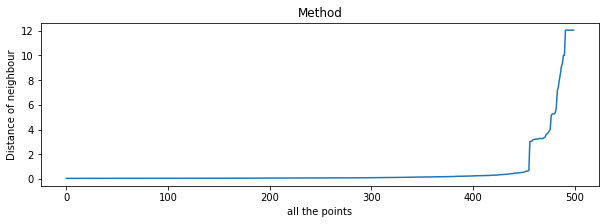

In [67]:
plt.figure(figsize=(10,3))
plt.title("Method")
plt.plot([i for i in range(len(neighbour))], neighbour)
plt.xlabel("all the points")
plt.ylabel("Distance of neighbour")
plt.show()

In [78]:
design = DBSCAN(eps = 8, min_samples = points, n_jobs=-2)
design.fit(vectors)
Df1['WMword design'] = design.labels_
Df1.head(4)

,index,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,puncless,mstopwords,numbers,lowest,stemming,freshdata,tf_idf cluster labelling,WMword design
0,27982,Apple iPhone 5c 32GB - Unlocked - (Green),Apple,224.77,3.0,"the phone is unlocked thats good, but not is o...",1.0,"the phone is unlocked thats good, but not is o...","phone unlocked thats good, 8GB 5GB","phone unlocked thats good, GB GB","phone unlocked thats good, gb gb","phone unlock that good, gb gb","phone unlock that good, gb gb",0,0
1,10370,Apple iPhone 4 A1332 32GB Black (GSM Unlocked),Apple,75.00,5.0,The phone works perfect. My son loved it!!! th...,1.0,The phone works perfect. My son loved it!!! th...,The phone works perfect. My son loved it!!! sh...,The phone works perfect. My son loved it!!! sh...,the phone works perfect. my son loved it!!! sh...,the phone work perfect. my son love it!!! ship...,the phone work perfect. my son love it!!! ship...,1,0
2,47297,Apple iPhone 5s 64GB (Gold) -T-Mobile,Apple,265.00,5.0,The iphone is unlock Good phone but bad ime att,0.0,The iphone is unlock Good phone but bad ime att,The iphone unlock Good phone bad ime att,The iphone unlock Good phone bad ime att,the iphone unlock good phone bad ime att,the iphon unlock good phone bad ime att,the iphon unlock good phone bad ime att,0,0
3,70917,"Apple iPhone 6S Plus Unlocked Smartphone, 32 G...",Apple,749.99,5.0,Good,0.0,Good,Good,Good,good,good,good,4,0


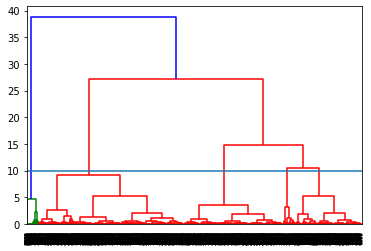

In [102]:
import scipy
from scipy.cluster import hierarchy
Dendogram = hierarchy.dendrogram(hierarchy.linkage(vectors,method='ward'))
plt.axhline(y=10)

In [88]:
from sklearn.cluster import AgglomerativeClustering

clustering_analysis = AgglomerativeClustering(n_clusters=7, affinity='euclidean', linkage='ward')  
Agg = clustering_analysis.fit_predict(vectors)
Df1['WMword cluster'] = clustering_analysis.labels_
Df1.head(6)
Df1.groupby(['WMword cluster'])['freshdata'].count()


WMword cluster
0    1315
1     139
2     412
3    1202
4     141
5     532
6     259
Name: freshdata, dtype: int64

In [105]:
for a in range(6):
    print("sentence", a) #reviews assigned to cluster
    print(Df1.iloc[Df1.groupby(['WMword cluster']).groups[a][0]]['freshdata'])
    print(Df1.iloc[Df1.groupby(['WMword cluster']).groups[a][1]]['freshdata'])


sentence 0
phone unlock that good, gb gb
the iphon unlock good phone bad ime att
sentence 1
+++++
estafa horribl
sentence 2
thi phone lock i got even though say un-locked.
work great
sentence 3
the phone work perfect. my son love it!!! shipment realli fast problem activ it. thank you!!! awesome!!
% great seller. no problem ever im plea
sentence 4
great!
great!
sentence 5
thi item iphon box box reseal weird black tape ear bud charger box box japanes horribl fraud
i bought wife soon move t-mobil at&t. i usual fear buy expens electron anyon besid manufactur cell phone provider, one work great far.i deduct star sinc i specif chose one said includ charger end included. small issu howev i'm alreadi save much money phone.


In one paragraph, please compare K means, DBSCAN and Hierarchical clustering.

K-means clustering is an alogorithm where the attributes and features are classified into k number of groups.Here, K is a positive integer and the sum of the squares of the distance is grouped
by minimising them and the centroid cluster. This clustering is the most used in the present industry and it computes fast than any other clustering techniques but it doesn't give the same result 
everytime since the resulting clusters depends on the initial random assignments. K means simply minimizes the variance in a cluster called as SSE(Sum of squared errors).DBscan is a density
based non-parametric clustering algorithm. The set of points are grouped together which are closely packed marking as outliers in low-density region. Hierarchical clustering is an unsupervised 
technique that gives successive clustering based on previously established clusters. Agglomerative is the on of the hierarchical clustering alogorithm which begins each one into seperate clusters 
and then merges into larger one. In this clustering method, the elements are grouped based on the distance between the each cluster
